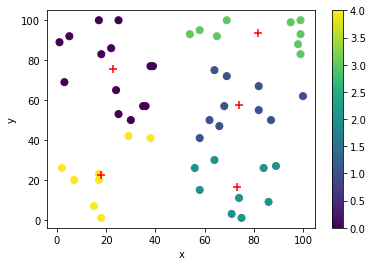

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from other import routing_one_ambulance, routing_for_4

df = pd.read_csv("sample1.csv")
number_of_hospital = 5

kmeans = KMeans(n_clusters= number_of_hospital)
kmeans.fit(df[['x', 'y']])
#df['cluster'] = kmeans.predict(df[['x', 'y']]).tolist()
x = df["x"]
y = df["y"]
Cluster = kmeans.labels_
#scatter = ax.scatter(x,y,c=Cluster,s=50)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=Cluster,s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
centers = kmeans.cluster_centers_
for i,j in centers:
    ax.scatter(i,j,s=50,c='red',marker='+')
plt.colorbar(scatter)

fig.show()

,x,y,time_to_live,cluster
0,68,28,115,2
1,16,77,94,1
2,32,69,144,1
3,66,5,115,2
4,100,72,129,4
...,...,...,...,...
293,69,68,99,4
294,62,34,71,2
295,26,43,89,0
296,41,96,143,1


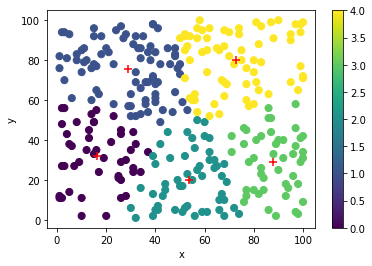

In [2]:
df = pd.read_csv("sample2.csv")
def plot_cluster(df, number_cluster):

    kmeans = KMeans(n_clusters= number_cluster)
    kmeans.fit(df[['x', 'y']])
    x = df["x"]
    y = df["y"]
    Cluster = kmeans.labels_
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(x,y,c=Cluster,s=50)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    centers = kmeans.cluster_centers_
    for i,j in centers:
        ax.scatter(i,j,s=50,c='red',marker='+')
    plt.colorbar(scatter)

    fig.show()
    df["cluster"] = kmeans.labels_
    return df
plot_cluster(df, 5)

In [3]:
df = pd.read_csv("sample2.csv")
number_of_hospital = 5
num_ambulance_at_hospital = [6, 5, 5, 3, 3]

kmeans = KMeans(n_clusters= number_of_hospital)
kmeans.fit(df[['x', 'y']])
df["cluster"] = kmeans.labels_
cluster_locations = kmeans.cluster_centers_


In [4]:
import heapq
from collections import Counter, defaultdict
heap = []
for i, count in enumerate(num_ambulance_at_hospital):
    heap.append((-count, i))
heapq.heapify(heap)

print(heap)

cluster_map = {}
counter = Counter(kmeans.labels_)
print(counter)

for i, (elem, count) in enumerate(counter.most_common()):
    count, hospital_idx = heapq.heappop(heap)
    print(-count, hospital_idx)
    cluster_map[elem] = hospital_idx

print(cluster_map)

hospital_number = []
for cluster_num in kmeans.labels_:
    hospital_idx = cluster_map[cluster_num]
    hospital_number.append(hospital_idx)
df["hospital_number"] = hospital_number

[(-6, 0), (-5, 1), (-5, 2), (-3, 3), (-3, 4)]
Counter({0: 79, 2: 69, 1: 54, 3: 50, 4: 46})
6 0
5 1
5 2
3 3
3 4
{0: 0, 2: 1, 1: 2, 3: 3, 4: 4}


4           146         24.925926
3
printing for the ambulance 10
    index   x   y  time_to_live  time_to_hospital
0      75  59  22            53          7.222222
1     294  62  34            71         22.222222
2      19  58  27            84         11.222222
3     145  69  19            89         16.074074
4     128  62  30           104         18.222222
5     257  64  30           114         20.222222
6     291  65  27           114         18.222222
7       0  68  28           115         22.222222
8     237  57  25           121          8.222222
9     102  64  26           126         16.222222
10    168  67  22           131         15.222222
(7, [[75.0, 294.0, 19.0, 237.0], [145.0, 168.0], [102.0]])
    index   x   y  time_to_live  time_to_hospital
0      75  59  22            53          7.222222
1     294  62  34            71         22.222222
2      19  58  27            84         11.222222
3     145  69  19            89         16.074074
4     128  62  30        

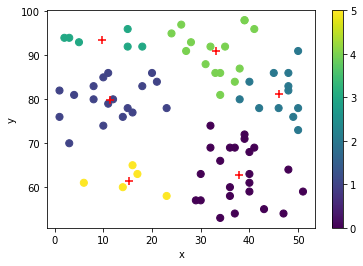

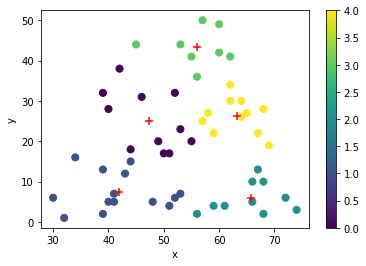

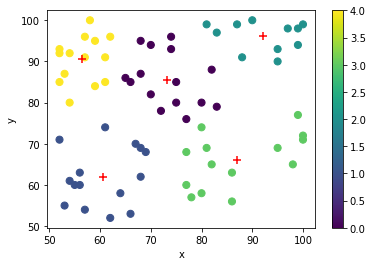

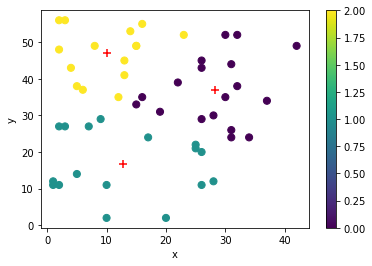

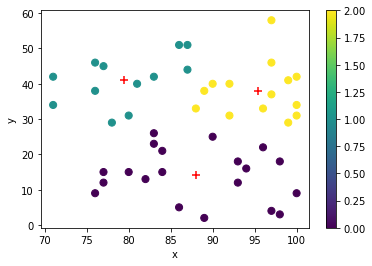

In [5]:
patients_picked = []
am_number = 0
total_patients_picked = 0
for cluster_num in range(number_of_hospital):

    hospital_number = cluster_map[cluster_num]

    df_hospital = df.loc[df['hospital_number'] == hospital_number]
    hospital_location = cluster_locations[cluster_num]
    hospital_total_ambulance = num_ambulance_at_hospital[hospital_number]

    df_hospital = plot_cluster(df_hospital, hospital_total_ambulance)

    df_hospital["time_to_hospital"] = abs(df_hospital["x"] - hospital_location[0]) + abs(df_hospital["y"]-hospital_location[1])
    
    for ambulance_no in range(hospital_total_ambulance):
        df_ambulance = df_hospital.loc[df_hospital['cluster'] == ambulance_no]
        df_ambulance["index"] = df_ambulance.index
        print("printing for the ambulance", am_number)
        
        df_ambulance.to_csv(str(am_number) + ".csv", index = False)
        print(routing_one_ambulance(df_ambulance))
        num, patient_per_ambulance = routing_one_ambulance(df_ambulance)
        patients_picked.append(patient_per_ambulance)
        print(num)
        total_patients_picked = total_patients_picked + num
        am_number = am_number + 1






In [6]:
patients_picked

[[[82.0, 218.0], [21.0, 2.0], [230.0]],
 [[185.0, 238.0, 31.0], [159.0, 1.0], [134.0, 260.0]],
 [[127.0, 246.0, 126.0, 53.0], [277.0, 88.0, 34.0]],
 [[281.0, 235.0]],
 [[62.0, 60.0, 10.0, 112.0], [108.0, 172.0], [213.0]],
 [[28.0, 259.0, 78.0, 176.0]],
 [[99.0, 171.0, 152.0], [94.0], [163.0, 193.0, 211.0], [45.0]],
 [[204.0, 217.0], [90.0], [169.0]],
 [[229.0, 84.0, 195.0, 282.0], [158.0, 182.0]],
 [[136.0, 7.0], [66.0]],
 [[75.0, 294.0, 19.0, 237.0], [145.0, 168.0], [102.0]],
 [[243.0, 251.0, 276.0, 154.0], [8.0, 290.0, 153.0], [177.0], [173.0, 29.0]],
 [[248.0], [104.0, 137.0]],
 [[114.0, 165.0, 175.0]],
 [[85.0, 266.0, 27.0, 167.0], [20.0]],
 [[174.0, 209.0], [111.0, 216.0]],
 [[155.0, 12.0, 106.0, 268.0], [221.0, 224.0, 160.0]],
 [[25.0, 199.0, 288.0], [115.0, 261.0]],
 [[16.0, 227.0, 14.0, 147.0], [71.0]],
 [[181.0, 244.0, 289.0, 272.0], [6.0, 190.0]],
 [[37.0, 32.0, 242.0], [161.0, 150.0, 240.0]],
 [[283.0, 273.0, 107.0, 270.0], [11.0, 236.0, 187.0, 141.0], [183.0]]]

In [7]:
total_patients_picked 

123

In [8]:
patients_picked

[[[82.0, 218.0], [21.0, 2.0], [230.0]],
 [[185.0, 238.0, 31.0], [159.0, 1.0], [134.0, 260.0]],
 [[127.0, 246.0, 126.0, 53.0], [277.0, 88.0, 34.0]],
 [[281.0, 235.0]],
 [[62.0, 60.0, 10.0, 112.0], [108.0, 172.0], [213.0]],
 [[28.0, 259.0, 78.0, 176.0]],
 [[99.0, 171.0, 152.0], [94.0], [163.0, 193.0, 211.0], [45.0]],
 [[204.0, 217.0], [90.0], [169.0]],
 [[229.0, 84.0, 195.0, 282.0], [158.0, 182.0]],
 [[136.0, 7.0], [66.0]],
 [[75.0, 294.0, 19.0, 237.0], [145.0, 168.0], [102.0]],
 [[243.0, 251.0, 276.0, 154.0], [8.0, 290.0, 153.0], [177.0], [173.0, 29.0]],
 [[248.0], [104.0, 137.0]],
 [[114.0, 165.0, 175.0]],
 [[85.0, 266.0, 27.0, 167.0], [20.0]],
 [[174.0, 209.0], [111.0, 216.0]],
 [[155.0, 12.0, 106.0, 268.0], [221.0, 224.0, 160.0]],
 [[25.0, 199.0, 288.0], [115.0, 261.0]],
 [[16.0, 227.0, 14.0, 147.0], [71.0]],
 [[181.0, 244.0, 289.0, 272.0], [6.0, 190.0]],
 [[37.0, 32.0, 242.0], [161.0, 150.0, 240.0]],
 [[283.0, 273.0, 107.0, 270.0], [11.0, 236.0, 187.0, 141.0], [183.0]]]

In [9]:
am_number

22